In [1]:
# https://medium.com/datadriveninvestor/linear-regression-using-tensorflow-estimator-9aa570914375

In [2]:
import os
import datetime
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing

%matplotlib inline

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_nodeinfo.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_nodeinfotest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,0.543895,0.008625,924.236712,63156.175327,0.176144,2128.447148,10523.371640,1.0,50.0,0.103940,6.0,44.260521,1.240458e+10,36.548910
1,0.555150,0.011289,12651.807738,94205.906535,0.176144,6182.507055,20512.544166,1.0,192.0,0.108720,6.0,44.260521,1.240458e+10,37.249118
2,0.521781,0.010222,12652.088889,107315.200000,0.196314,7243.755556,20228.244444,1.0,333.0,0.105527,6.0,15.116667,1.240458e+10,37.249118
3,0.521781,0.009778,11832.888889,115234.133333,0.196314,8994.822222,25560.088889,1.0,474.0,0.108370,6.0,15.116667,1.240458e+10,37.201915
4,0.406110,0.008533,0.000000,97939.911111,0.196123,7063.244444,18804.822222,1.0,564.0,0.103987,6.0,10.733333,1.240458e+10,37.201915


In [4]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [5]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
#df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
#df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
#df_t['replica'] = df['replica']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
#df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
#df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
#df_ttest['replica'] = df_test['replica']
df_t.head()

,total_cpu_util,requests
0,2.655631,50.0
1,2.655631,192.0
2,0.907000,333.0
3,0.907000,474.0
4,0.644000,564.0


In [6]:
#muthu = df_t
#X = muthu.loc[:,['total_cpu_util','total_mem_util','replica', 'requests']].values
#X = preprocessing.normalize(X, norm='max')
#y = muthu.loc[:,['responsetime']].values
#kf = KFold(n_splits=7, random_state=42, shuffle=True)
#for train_index, test_index in kf.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    print(X_train, '\n', y_train)
#    print(X_test, '\n', y_test)

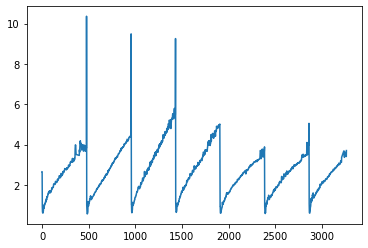

In [7]:
plt.plot(df_t['total_cpu_util'])

In [8]:
#plt.plot(df_t['responsetime'])

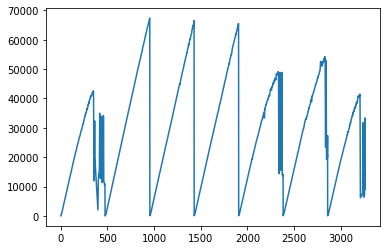

In [9]:
plt.plot(df_t['requests'])

In [10]:
n = len(df)
train_df = df_t[0:int(n*0.8)]
eval_df = df_t[int(n*0.8):]
test_df = df_ttest[:]

#train_mean = train_df.mean()
#print(train_mean)
#train_std = train_df.std()
#print(train_std)

#train_df = (train_df - train_mean) / train_std
#test_df = (test_df - train_mean) / train_std
#train_df

In [11]:
#import seaborn as sns
#df_std = (df_t - train_mean) / train_std
##print(df_std)
#df_std = df_std.melt(var_name='Column', value_name='Normalized')
##print(df_std)
#plt.figure(figsize=(12, 6))
#ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
#_ = ax.set_xticklabels(df_t.keys(), rotation=90)

In [12]:
from sklearn import preprocessing
#df_new = df.drop(['cpu','mem','totalmemory','diskio', 'diskioRead', 'diskioWritten', 'networkReceived', 'networkTransmitted', 'totalcpuUtilization', 'totalmemoryUtilization'], axis=1)
x_train = train_df[[col for col in train_df.columns if col != 'requests']]
y_train = train_df['requests']
x_val = eval_df[[col for col in eval_df.columns if col != 'requests']]
y_val = eval_df['requests']
x_test = test_df[[col for col in test_df.columns if col != 'requests']]
y_test = test_df['requests']

In [13]:
#x_data.describe(include='all')

In [14]:
#x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.3)

In [15]:
feature_col = [tf.feature_column.numeric_column(col) for col in x_train.columns]

In [16]:
opti = tf.optimizers.Adam(learning_rate = 0.02)

In [17]:
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train, 
                                                y= y_train, 
                                                batch_size=100, 
                                                num_epochs=1000, 
                                                shuffle=False)

In [18]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x= x_test,                                                   
                                                 batch_size=10, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_val,
                                                      y=y_val, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [19]:
estimator = tf.estimator.DNNRegressor(hidden_units=[4,4,1], feature_columns=feature_col, optimizer=opti)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpu6pn7lg2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [20]:
estimator.train(input_fn=input_func,steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op

INFO:tensorflow:global_step/sec: 450.731
INFO:tensorflow:loss = 784916540.0, step = 4200 (0.222 sec)
INFO:tensorflow:global_step/sec: 446.345
INFO:tensorflow:loss = 463759550.0, step = 4300 (0.224 sec)
INFO:tensorflow:global_step/sec: 256.382
INFO:tensorflow:loss = 1547613400.0, step = 4400 (0.391 sec)
INFO:tensorflow:global_step/sec: 344.037
INFO:tensorflow:loss = 598356900.0, step = 4500 (0.292 sec)
INFO:tensorflow:global_step/sec: 262.132
INFO:tensorflow:loss = 3365185000.0, step = 4600 (0.381 sec)
INFO:tensorflow:global_step/sec: 350.582
INFO:tensorflow:loss = 625405000.0, step = 4700 (0.285 sec)
INFO:tensorflow:global_step/sec: 303.963
INFO:tensorflow:loss = 3349890600.0, step = 4800 (0.329 sec)
INFO:tensorflow:global_step/sec: 292.186
INFO:tensorflow:loss = 597058750.0, step = 4900 (0.342 sec)
INFO:tensorflow:global_step/sec: 351.636
INFO:tensorflow:loss = 3436725200.0, step = 5000 (0.284 sec)
INFO:tensorflow:global_step/sec: 364.653
INFO:tensorflow:loss = 609241860.0, step = 510

In [21]:
result_eval = estimator.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-09T09:55:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpu6pn7lg2/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.40714s
INFO:tensorflow:Finished evaluation at 2020-10-09-09:55:36
INFO:tensorflow:Saving dict for global step 10000: average_loss = 1087599500.0

In [22]:
result_eval

{'average_loss': 1087599500.0,
 'label/mean': 29709.092,
 'loss': 1073628900.0,
 'prediction/mean': 177.49826,
 'global_step': 10000}

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpu6pn7lg2/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

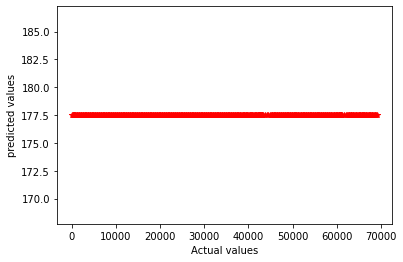

In [23]:
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, predictions))**0.5

198.7934977228698

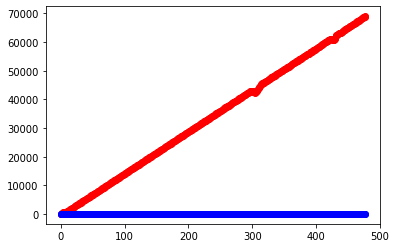

In [25]:
plt.scatter(range(0,len(y_test)),y_test, color='red')
plt.scatter(range(0,len(predictions)),predictions, color='blue')

In [26]:
from sklearn.metrics import r2_score
R = r2_score(y_test, predictions)
print ('R² :',R)

R² : -2.8860435005776175


In [27]:
print(y_test,predictions )

0         67.0
1        211.0
2        356.0
3        500.0
4        577.0
        ...   
473    68420.0
474    68579.0
475    68706.0
476    68838.0
477    69005.0
Name: requests, Length: 478, dtype: float64 [array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([177.49815369]), array([1

# Kfold - data split